In [31]:
#source- https://www.youtube.com/watch?v=CQveSaMyEwM
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
import matplotlib.pyplot as plt

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#based on the above value of the 4 features we define it as a paticular cluster


In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df.shape

(150, 4)

In [24]:
df["target"]=iris.target

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.target==1

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

In [26]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [30]:
df1=df[:50]
df2=df[50:100]
df3=df[100:]

#analysisng the dataset

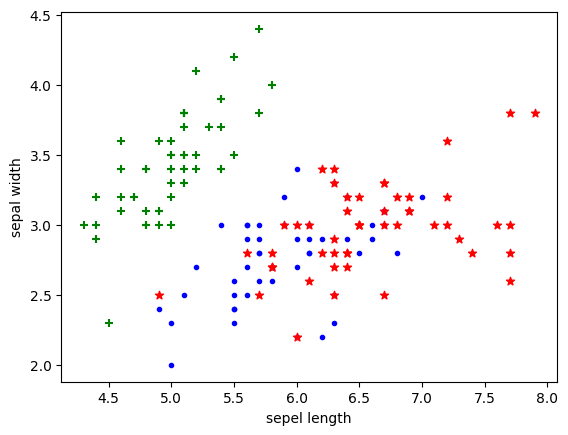

In [35]:
plt.xlabel("sepel length")
plt.ylabel("sepal width")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"],color="green",marker='+')
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"],color="blue",marker=".")
plt.scatter(df3["sepal length (cm)"], df3["sepal width (cm)"],color="red",marker="*")

In [37]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#train test split

In [38]:
from sklearn.model_selection import train_test_split
X=df.drop(["target", "flower_name"], axis='columns')
y=df.target

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
len(xtrain)

120

In [41]:
len(xtest)

30

In [47]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)


In [48]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [49]:
kn.score(xtest,ytest)

0.9666666666666667

#plotting teh confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix

ypred=kn.predict(xtest)

cnn = confusion_matrix(ytest,ypred)

cnn

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'True values')

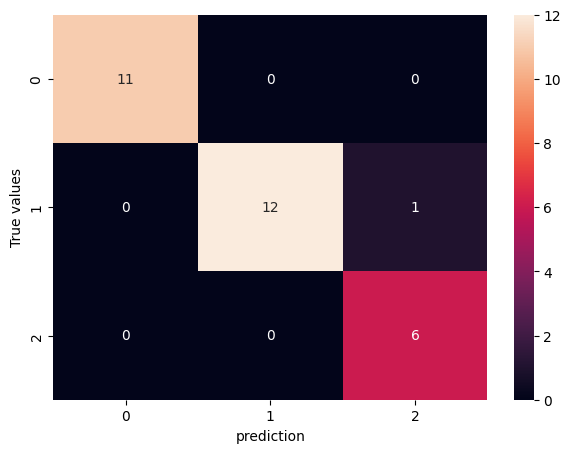

In [51]:
#using seaborn for better visualization
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cnn, annot=True)
plt.xlabel("prediction")
plt.ylabel("True values")


In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [54]:
#learn about precesion and recall